# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**ZF6 TEAM PREDICT**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In this section, we import the various packages we will be using throughout the notebook. 
The libraries that we will be using for Data Analysis and Data Engineering include:
Numpy-
Pandas-
Matplotlib-
Seaborn-

For purposes of data preprocessing, modelling and model accuracy assessment, we will be using the following package:
Sklearn- 

To save our model, we will use the pickle library. We will also be making use of the os library for file manipulation.

In [879]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn import metrics
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for file manipulation
import os

# Libraries to save the created model
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###


The following block of code will enable us to suppress the warnings throughout the notebook and improve the readability of the same:

In [880]:
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



Our data comes in two CSV files, one containing the training data and the other containing the test data. Below, we want to load the data from their respective files and into two seperate Dataframes.

In [881]:
# load the data
train_df = pd.read_csv('df_train.csv', index_col=0)
train_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [882]:
test_df = pd.read_csv('df_test.csv', index_col=0)
test_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


While loading our data, we use the df.head() function to get a snippet of our data. By taking a brief glance at our data, we are able to see the various features that we will be working with which mostly comprise of various weather readings from different cities in Spain. 

We also notice that the test and train datasets are relatively similar apart from the fact that the test data set is one feature less, i.e., the 'load_shortfall_3h'. This is not unusual  as we do not expect the test dataset to contain the response variable.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>




### LOOKING AT THE DATA STATISTICS

While loading our data, we got to see the number of columns that were present in our datasets. In addition, we also want to know how many observations are present in the training dataset. This is why we use the the df.shape() function to examine the number of rows and columns in the dataset.



In [884]:
train_df.shape
# (8763, 48)

(8763, 48)

The Training data has a total of 8763 rows and 48 columns.

This tells us that there are 8763 observations in our training dataset, 47 predictor variables and 1 outcome variable which we know to be the"load_shortfall_3h".

It would help to know the datatype of values stored in each column. This will help us to know how to handle the various columns during the data analysis and also take note of those columns that may need to be transformed in the data engineering section.

In [885]:
pd.DataFrame(train_df.dtypes, columns=["Dtype"])

,Dtype
time,object
Madrid_wind_speed,float64
Valencia_wind_deg,object
Bilbao_rain_1h,float64
Valencia_wind_speed,float64
Seville_humidity,float64
Madrid_humidity,float64
Bilbao_clouds_all,float64
Bilbao_wind_speed,float64
Seville_clouds_all,float64


It was also observed that most of the columns are ofthe numeric type. However, we also noticed that there are three non numeric columns in the dataset. They include:
- time
- Valencia_wind_deg
- Seville_pressure

The feature engineering section will touch on how these columns can be handled.

For the next part of our EDA, we will be performing univariate analysis using the non-graphical method. This involves looking at the descriptive statistics of each feature using the commnad df.describe(). This command will provide the mean, standard deviation and a five number summary of each numerical feature- Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum

 To make it easier to read, we transpose our output such that we have the statistics as columns and the features as rows. We also try to order the features according to the various cities.

In [886]:
# produce a sorted list of the dataframe columns

# This ensures that all the relevant information about a city can be seen at a glance
sorted_df_columns = train_df.columns.sort_values()

# show the summary statitics of the training data and round the values to 2 decimal places
# the resulting dataframe is transposed to give so that all column values can be seen at a glance
train_df[sorted_df_columns].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Barcelona_pressure,8763.0,1377.96,14073.14,670.67,1014.00,1018.00,1022.00,1001411.00
Barcelona_rain_1h,8763.0,0.13,0.63,0.00,0.00,0.00,0.00,12.00
Barcelona_rain_3h,8763.0,0.00,0.00,0.00,0.00,0.00,0.00,0.09
Barcelona_temp,8763.0,289.86,6.53,270.82,284.97,289.42,294.91,307.32
Barcelona_temp_max,8763.0,291.16,7.27,272.15,285.48,290.15,296.86,314.08
Barcelona_temp_min,8763.0,288.45,6.10,269.48,284.15,288.15,292.97,304.82
Barcelona_weather_id,8763.0,765.98,88.14,200.67,800.00,800.33,801.00,804.00
Barcelona_wind_deg,8763.0,190.54,89.08,0.00,118.17,200.00,260.00,360.00
Barcelona_wind_speed,8763.0,2.87,1.79,0.00,1.67,2.67,4.00,12.67
Bilbao_clouds_all,8763.0,43.47,32.55,0.00,10.00,45.00,75.00,100.00


There is evidence of serious skew in the data of some of the columns. They include the rain and snow columns for all the cities

A few of these are;

- `Barcelona_rain_1h`
- `Barcelona_rain_3h`
- `Bilbao_rain_1h`
- `Bilbao_snow_3h`
- `Madrid_rain_1h`

More than 75% of the values in these columns are 0.
To confirm this, let us perform and additional statistical measures, skew

Our suspisions have been confirmed as we can see some high positive and negative skew readings (<-1 and >1) especially those involving rain and snow readings.

### Exploring for Missing Values

Next, we check if there are any missing values in each column. Earlier, we saw that our dataset has 8762. We therefore expect each column to have the same number of observations. Let us confirm whether this is the case using the df.info() command.



In [887]:
pd.DataFrame(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

""


All columns seem to have the expected number of non-null values apart from The valencia pressure column which only has a total of 6695 non-null values. Let us check how many null values appear in this feature.

In [888]:
train_df['Valencia_pressure'].isnull().sum()

2068

The 'Valencia_pressure' column has 2068 null values. We will need to decide on how we will handle this missing values.

We next investigate what percentage of the data is missing, this will help us decide weather to drop the column or replace the missing values in it.

In [889]:
missing_percent = train_df['Valencia_pressure'].isnull().sum() * 100 / len(train_df)
print("missing percentage: " + str(round(missing_percent, 2)))

missing percentage: 23.6


With `23.6%` of the values missing we will replace the missing values with the average/mode `Valencia_pressure` readings for the month the missing value occurs. We will look at this further in the data engineering section.

We can have boxplot to see how the data in the column distributes itself.

<AxesSubplot:xlabel='Valencia_pressure'>

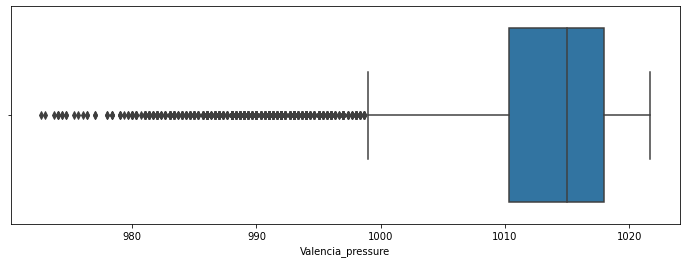

In [890]:
sns.boxplot(train_df['Valencia_pressure'])


Next we observe how many unique rows we have in our data set. We would expect time to have 100% unique.

We will take a look further on how we decide to handle columns with very little variation 

In [891]:
missing_percent = train_df.nunique()* 100 / len(train_df)
missing_percent

time                    100.000000
Madrid_wind_speed         0.433641
Valencia_wind_deg         0.114116
Bilbao_rain_1h            0.228232
Valencia_wind_speed       0.661874
Seville_humidity          3.126783
Madrid_humidity           3.195253
Bilbao_clouds_all         3.161018
Bilbao_wind_speed         0.445053
Seville_clouds_all        2.807258
Bilbao_wind_deg          11.890905
Barcelona_wind_speed      0.445053
Barcelona_wind_deg       11.114915
Madrid_clouds_all         2.852904
Seville_wind_speed        0.433641
Barcelona_rain_1h         0.353760
Seville_pressure          0.285290
Seville_rain_1h           0.193997
Bilbao_snow_3h            0.947164
Barcelona_pressure        2.156796
Seville_rain_3h           0.570581
Madrid_rain_1h            0.216821
Barcelona_rain_3h         0.878695
Valencia_snow_3h          0.068470
Madrid_weather_id         3.297957
Barcelona_weather_id      3.069725
Bilbao_pressure           2.339381
Seville_weather_id        3.434897
Valencia_pressure   

### Evaluating Correlation

We attempt to evaluate the correlation of data values using a heatmap

<AxesSubplot:>

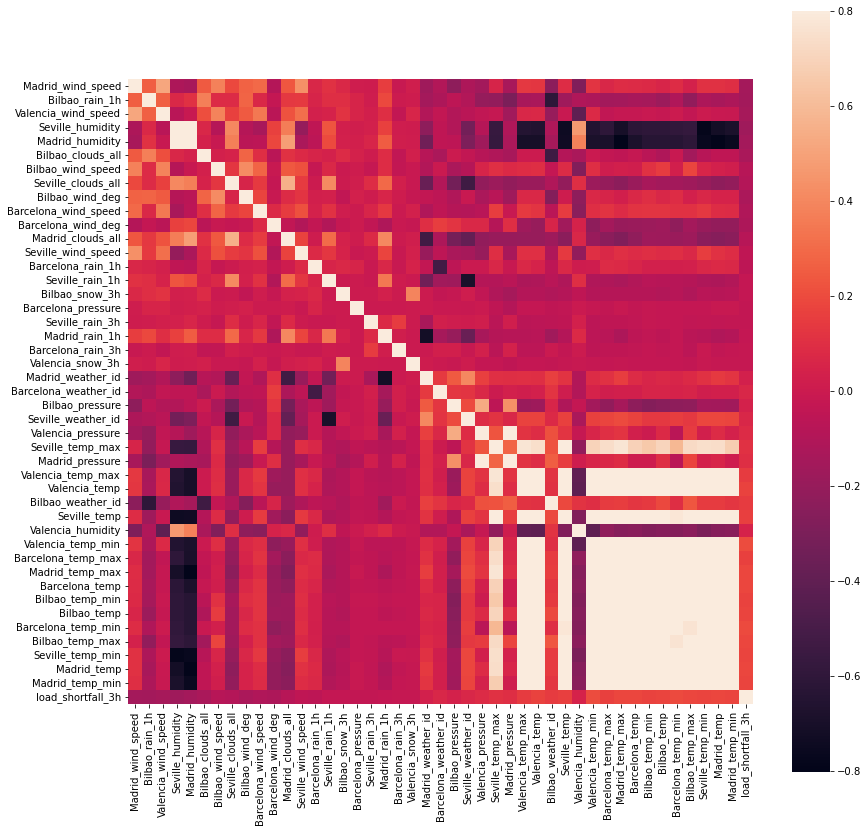

In [892]:
# evaluate correlation
corrmat = train_df.corr()
f = plt.figure(figsize =(14, 14))
sns.heatmap(corrmat, vmax=.8, square=True)

There are about 47 predictor columns in the dataset. plotting the relationship between all of them and the output might prove too verbose. Instead predictor columns which show considerable correlation with the load_shortfall are computed and plots are made for only those

In [893]:
def get_columns_by_corr(df, threshold):
    '''
    calculates the correlation between each predictor column and the output-'load_shortfall_3h'
    The threshold parameter is used to determine the appropriate column to plot
    '''
    correlation_map = df.corr()
    corrmap = correlation_map[['load_shortfall_3h']]
    
    # filter for both high positive correlation and high negative correlation hence the '> threshold` and '< -threshold'
    corrmap = corrmap[(corrmap['load_shortfall_3h'] > threshold)|(corrmap['load_shortfall_3h'] < -threshold)]
    
    return corrmap.drop('load_shortfall_3h').T.columns

In [894]:
corr_columns = get_columns_by_corr(train_df, 0.12)

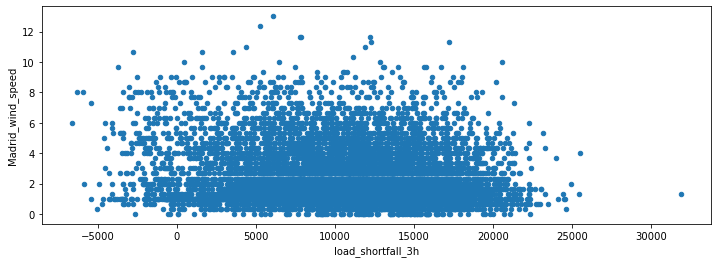

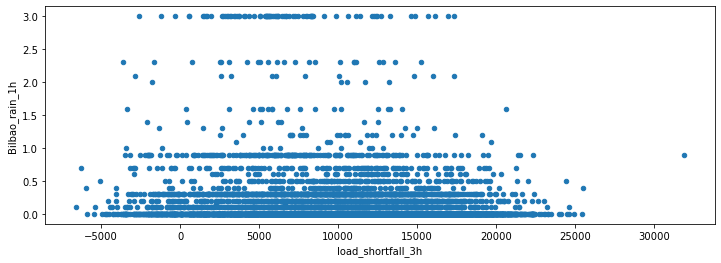

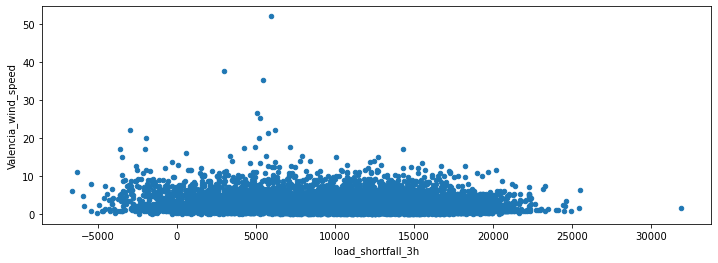

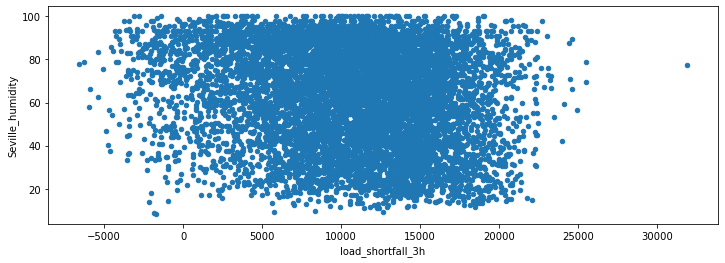

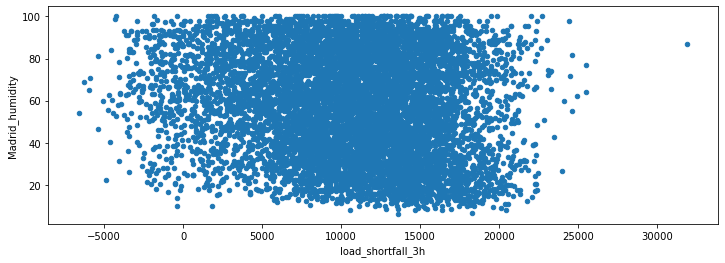

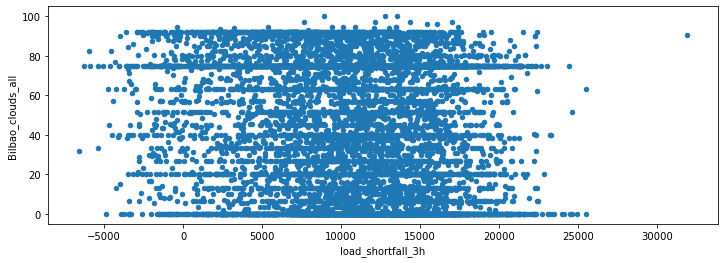

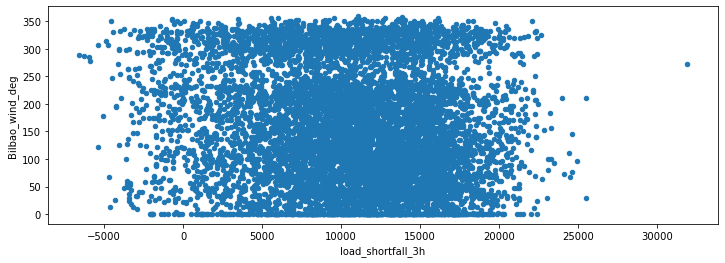

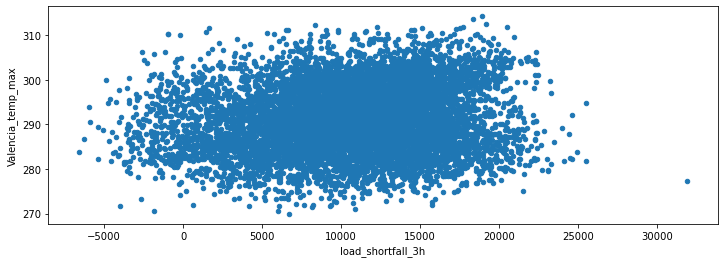

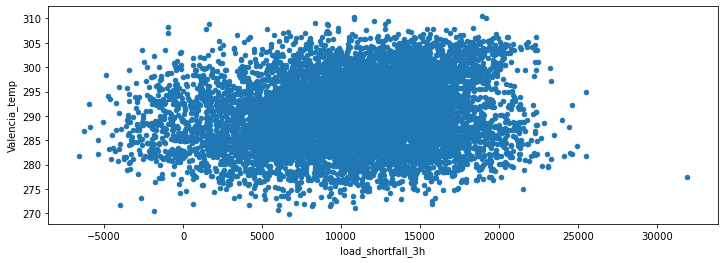

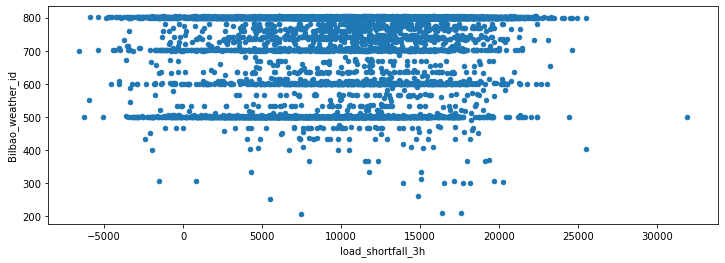

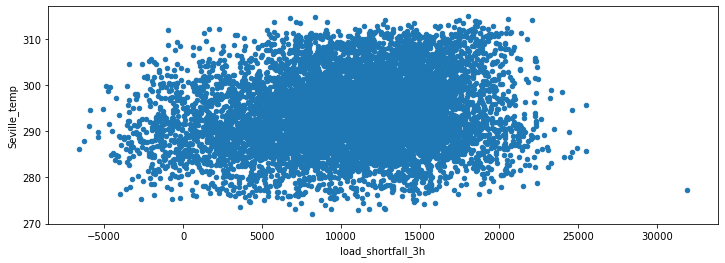

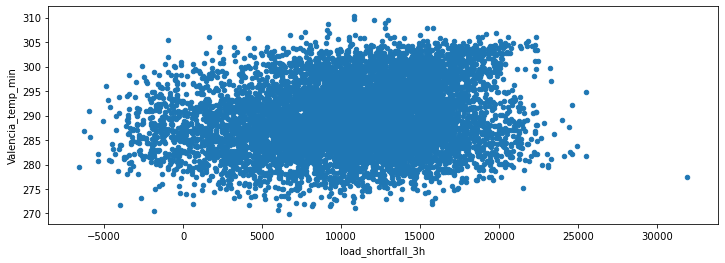

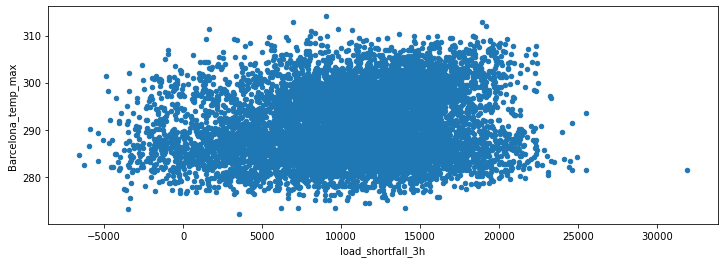

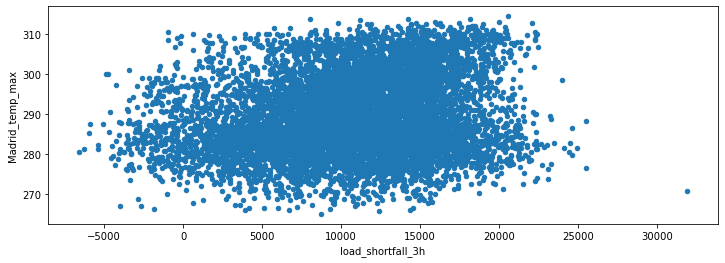

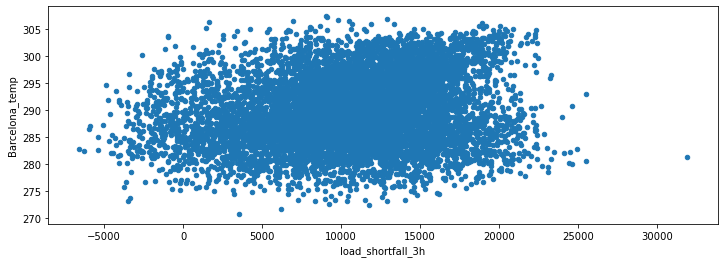

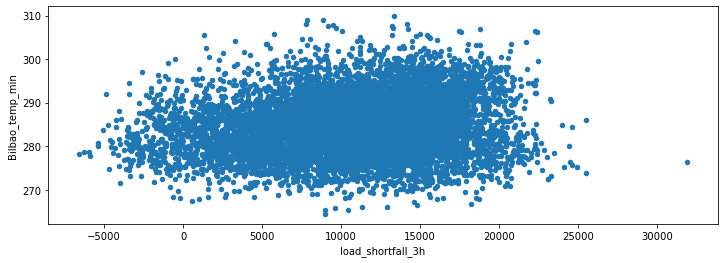

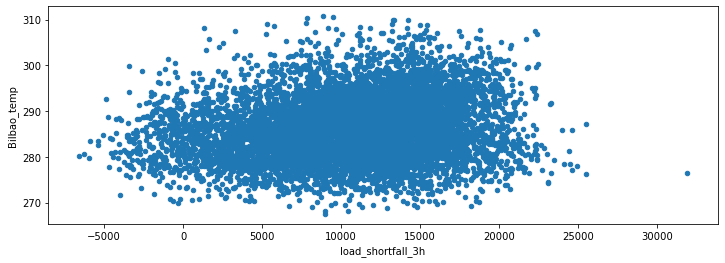

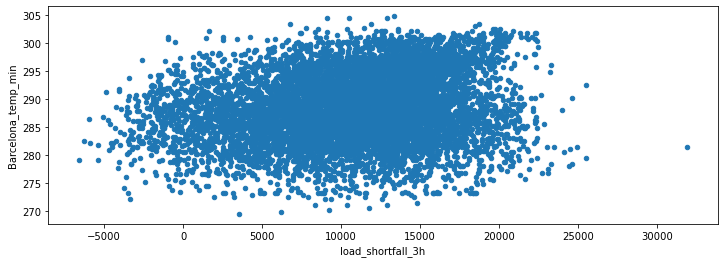

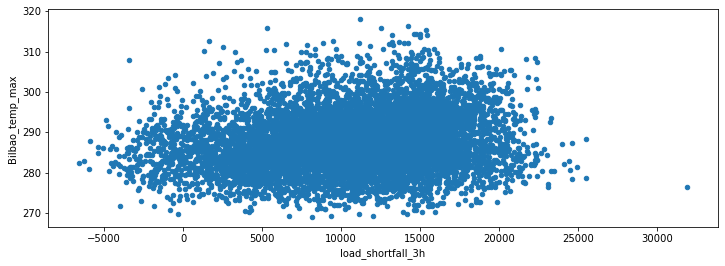

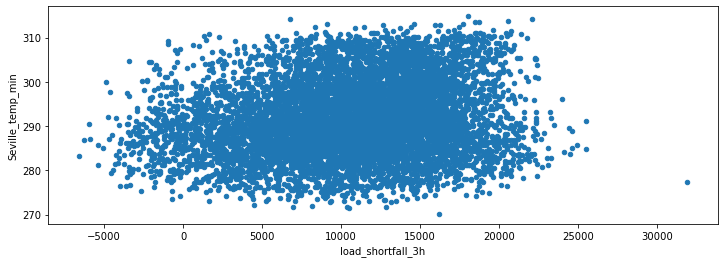

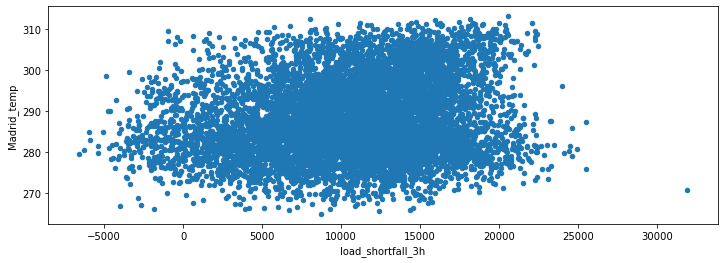

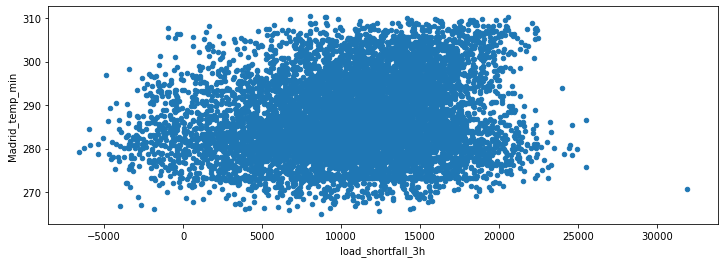

In [895]:
for col in corr_columns:
    train_df.plot.scatter(x='load_shortfall_3h', y=col)

What is immediately obvious is that the predictor columns have very little linear correlation with the output. And this suggests that a linear machine learning model would not perform well as the plots shows very high levels of non-linearity

A strong positive correlation is observed between the temperature readings across all the different cities

This makes sense as it is reasonable to expect different locations in one country to not have widly varying temperature readings. This though may make it difficult to build an acurate model so a fix for it might be to take the sum of all three temperature columns ('temp', 'temp_min', 'temp_max') to create a single predictor column per city.

A strong negative correlation is also present between temperature readings and humdity across all cites suggesting that the hotter the cites are the less humidity was measured. This too is a reasonable expectation

A strong negative correlation is also present between the weather_id readings and rainfall readings, as well as between weather_id readings and clouds_all readings

### A look at feature distributions

To add further structure to the plots, we first create a dictionary with the city names as the key and a dataframe of associated columns as the value. This is so that we are able to group the feature distributions per city.

In [896]:
# It might reveal some insight to examine the data on the basis of cities
def group_df_by_cites(df):
    df = df.copy()
    col_group = []
    used_col_names = []
    current_index = -1
    cities_dictionary = {}
    sorted_col_names = df.drop(['load_shortfall_3h', 'time'], axis=1).columns.sort_values()

    for col in sorted_col_names:
        col_split = col.split("_")[0]
        if col_split not in used_col_names:
            col_group.append(list())
            used_col_names.append(col_split)
            current_index = current_index + 1
        col_group[current_index].append(col)


    for group in col_group:
        group.sort()
        city_name = group[0].split("_")[0]
        cities_dictionary[city_name] = df[group]
        #cities_dictionary[city_name]['load_shortfall_3h'] = df['load_shortfall_3h']
        #cities_dictionary[city_name]['time'] = df['time']
        #cities_dictionary[city_name] = cities_dictionary[city_name].drop([city_name+'_temp_max', city_name+'_temp_min'], axis=1)
    return cities_dictionary

In [897]:
cities = group_df_by_cites(train_df)

array([[<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:title={'center':'Barcelona_weather_id'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>]],
      dtype=object)

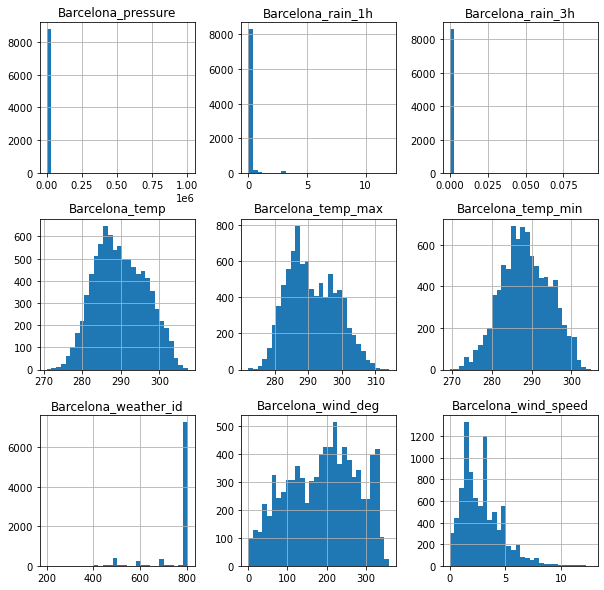

In [898]:
cities["Barcelona"].hist(bins=30, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Bilbao_temp'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

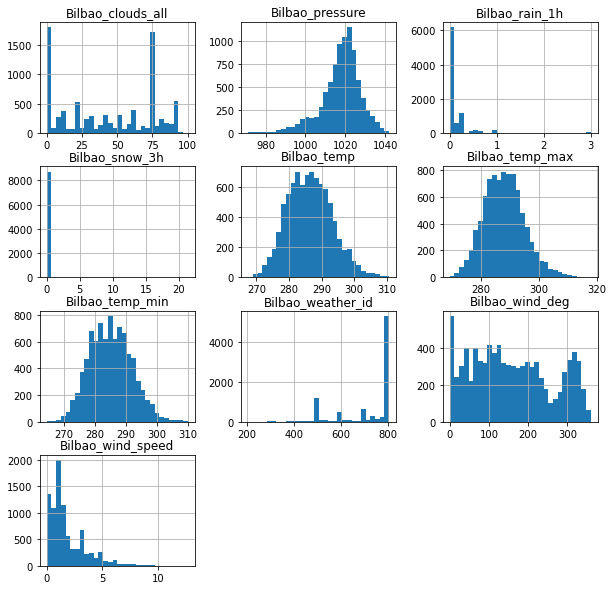

In [899]:
cities["Bilbao"].hist(bins=30, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Valencia_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>,
        <AxesSubplot:title={'center':'Valencia_snow_3h'}>],
       [<AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>],
       [<AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

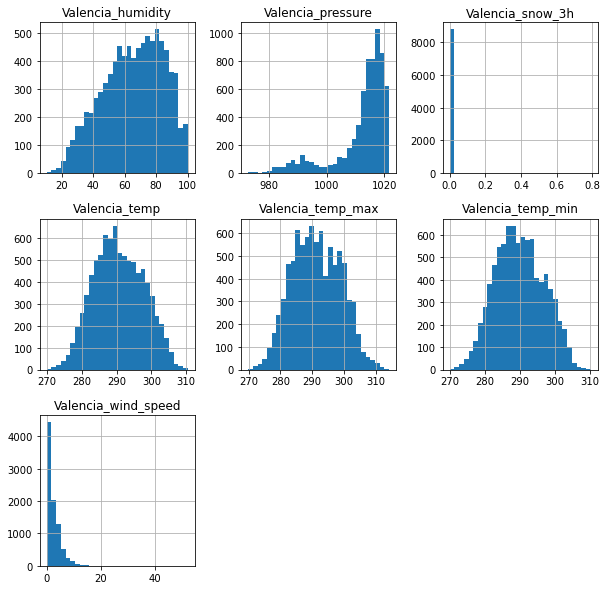

In [900]:
cities["Valencia"].hist(bins=30, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_rain_1h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_3h'}>,
        <AxesSubplot:title={'center':'Seville_temp'}>,
        <AxesSubplot:title={'center':'Seville_temp_max'}>],
       [<AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>]],
      dtype=object)

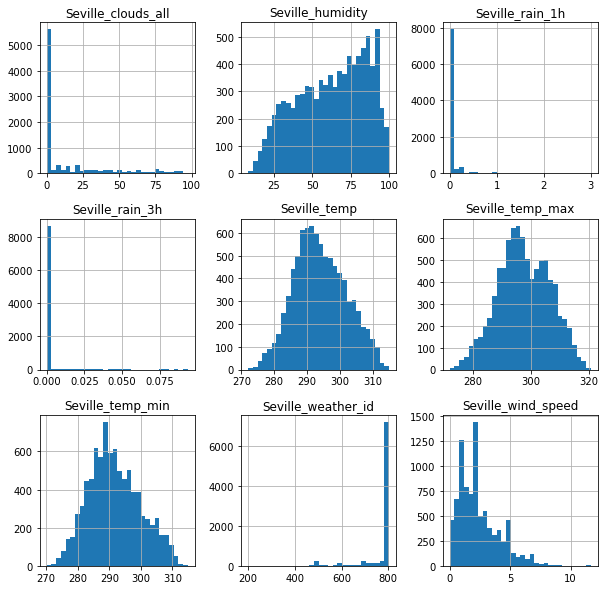

In [901]:
cities["Seville"].hist(bins=30, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_max'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_min'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_wind_speed'}>]], dtype=object)

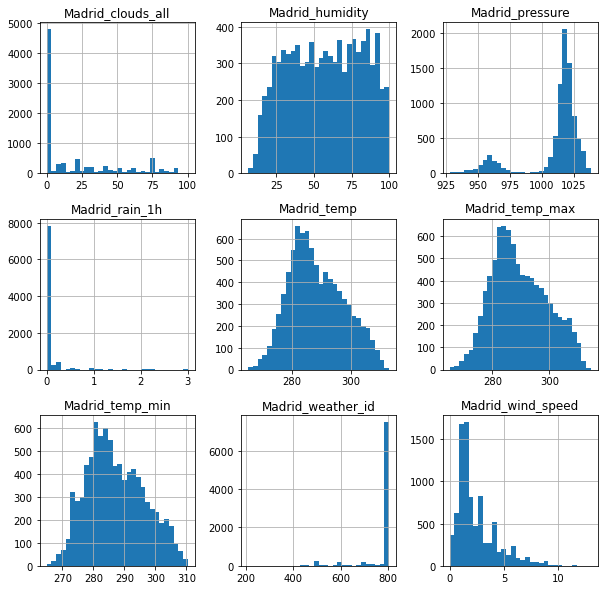

In [902]:
cities["Madrid"].hist(bins=30, figsize=(10,10))

The high skew hinted of the rain and snow readings hinted earlier by the summary statics can be clearly seen in the histograms.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [1254]:
# remove missing values/ features

### 4.1.0 Importing Data

We begin feature engineering here. And since the process of model improvement is largely iterative we have found it very helpful to repeat the logic for loading the CSV file here. This is because we often need to make some changes to the feature engineering section and as such require fresh data to work with

In [1266]:
train_df = pd.read_csv('df_train.csv', index_col=0)
test_df = pd.read_csv('df_test.csv')
test_df.drop('Unnamed: 0',axis=1, inplace=True)

###  4.2.0 Extract Year,Month,Day,Hour, from datetime pandas

It would prove very helpful to break up the time column into Year, month, day, and time columns.This would make it possible for the model to learn the weather patterns that corresponds to the various times of the year and improve the model performance.

In [1267]:
def split_time(df):
    #make a copy of the original dataframe
    df_copy=df.copy()
    
    #Create a DataFrame with Datetime values
    df_copy['time']=pd.to_datetime(df_copy['time'])
    
    #The year of the datetime.
    df_copy['Year']=df_copy['time'].dt.year
    
    #The month as January=1, December=12.
    df_copy['Month']=df_copy['time'].dt.month
    
    #The day of the datetime.
    df_copy['Day']=df_copy['time'].dt.day
    
    #The hours of the datetime.
    df_copy['Hour']=df_copy['time'].dt.hour
    
    #The minutes of the datetime.
    df_copy['Minute']=df_copy['time'].dt.minute
    
    #The day of the week with Monday=0, Sunday=6.
    df_copy['DayOfWeek']=df_copy['time'].dt.dayofweek
    
    #The ordinal day of the year.
    df_copy['DayOfYear']=df_copy['time'].dt.dayofyear
    
    #The quarter of the date.
    df_copy['Quarter']=df_copy['time'].dt.quarter
    
    #drop the time column
    df_copy.drop(columns='time',axis=1,inplace=True)
    return df_copy

###   4.3.0  Extract seasons from months column

We are interested in finding out  the effect of weather on the the energy loadshorfall in the main Spanish cities.

In [1268]:
def season_of_date(df):
    #make a copy of the original dataframe
    df_copy=df.copy()
    
    for month in df['Month']:
        
        #assign winter=1 when 
        if (month==12 or month <3):
            df_copy['Winter']=1
        elif month < 6:
            df_copy['Spring']=2
        elif month < 9:
            df_copy['Summer']=3
        else:
            df_copy['Autumn']=4  
  
    return df_copy

###  4.4.0  Handling_Missing_Values

Since our dataset now have columns for year, and month. 
A good approach to take when replacing the missing values in the valencia_pressure columns is to replace with the average reading for the month in which the reading was made

- The mean values of the `Valencia_pressure` is aggregated by Year and month
- Missing values are then replaced with the mean of the corresponding month

In [1269]:
def replace_valencia_pressure(df):
    #make a copy of the original dataframe
    df_copy=df.copy()
    
    df_copy['Valencia_pressure']=df_copy.groupby(['Year', 'Month'])['Valencia_pressure'].transform(func = lambda x: x.fillna(x.mean() )  )      
        
    return df_copy


In [1270]:
# create new features

###  4.5.0  Handle_Categorical_Column(Variables)


There are several ways to handle categorical variables;

- The `handle_categorical_column` function creates dummy variables for each column. 
- The `handle_categorical_column_v2` function simply subsets the string values to portions that can be parsed as into numeric values

We have both so that we can safely avoid the problem of a data set with too many dimensions and not enough data to train the model

In [1271]:
def handle_categorical_column(input_df, colunmn_name):
    #make a copy of the original dataframe
    copy_df = input_df.copy()
    # extract the numerical value from the columns 
    copy_df[colunmn_name] = copy_df[colunmn_name].str.extract('(\d+)')
    copy_df[colunmn_name] = pd.to_numeric(copy_df[colunmn_name])
    # your code here
    return copy_df

### 4.6.0  Handling multicolinearity

The multicolinearity observed between the temperature readings across the various cities as shown in the heat map plotted above can be reduced by simply summing the the average, max, and min temperature reading per city

In [1272]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in negetive and positive coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [1273]:
corr_features = correlation(train_df, 0.95)
corr_features

{'Barcelona_temp',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Madrid_temp',
 'Madrid_temp_min',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

A seperate function for droping columns is created. This makes it easy to rapidly make changes to the training data when improving model perfomance

###  4.7.0  Droping noise(unimportant_ columns ) in our dataset

In [1274]:
# drop any unneccesary column
def drop_columns(input_df):
    #make a copy of the original dataframe
    copy_df = input_df.copy()
    
    # columns to drop because of the are indexes and donot contribute to our model performance
    irrelevant_columns = ['Bilbao_weather_id','Seville_weather_id','Barcelona_weather_id','Barcelona_temp',
                             'Barcelona_temp_min',
                             'Bilbao_temp',
                             'Bilbao_temp_max',
                             'Madrid_temp',
                             'Madrid_temp_min',
                             'Seville_temp_min',
                             'Valencia_temp',
                             'Valencia_temp_min']
    
    drop_total = irrelevant_columns 
    copy_df.drop(drop_total,inplace=True, axis=1)
    return copy_df



###  4.7.0 Modified Dataframe

In [1275]:
def modified_dataframe(df):
    df_copy=split_time(df)
    df_copy=season_of_date(df_copy )
    df_copy=replace_valencia_pressure(df_copy )
    df_copy=handle_categorical_column(df_copy ,'Valencia_wind_deg')
    df_copy=handle_categorical_column(df_copy ,'Seville_pressure' )
    df_copy=drop_columns(df_copy )
    return df_copy 

In [1276]:
train_df_clean=modified_dataframe(train_df) 
test_df_clean=modified_dataframe(test_df)  
test_df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Day,Hour,Minute,DayOfWeek,DayOfYear,Quarter,Winter,Spring,Summer,Autumn
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,1,0,0,0,1,1,1,2,3,4
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,1,3,0,0,1,1,1,2,3,4
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,1,6,0,0,1,1,1,2,3,4
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,1,9,0,0,1,1,1,2,3,4
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,1,12,0,0,1,1,1,2,3,4


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

split data

We create dataframes for predictors as well as the output - `load_shortfall`

In [1277]:
def modelfit(model, X_train, X_test, y_train, y_test, performance=True, printFeatureImportance=True, ):
    from sklearn.metrics import mean_squared_error as MSE
    
    #Fit the algorithm on the data
    model.fit(X_train,y_train)
        
    #Predict training set:
    y_pred_train = model.predict(X_test)
    
    #Perform cross-validation:
    if performance:
        RMSE_test = (MSE(y_test,y_pred_train))**(1/2)
    
    #Print model report:
    print ("\nModel Report")
    print('Test RMSE: {:.2f}'.format(RMSE_test))
  

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(data=model.feature_importances_,index= X_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()

In [1278]:
X = train_df_clean.drop(['load_shortfall_3h'], axis=1)

y = train_df_clean['load_shortfall_3h']

The training data is split into a training set (80%) and a validation set (20%)

In [1279]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

create targets and features dataset

In [1280]:
# Save the time column for use later
X_test_time = test_df[['time']]


###  5.1.0 Standardize The Dataset  To Train  Our Linear Models 

We standardized and re-scaled the data to reduce the effect of outliers on our model

In [1281]:
# Standardize the model to place all columns in the same scale
scaler = StandardScaler()
X_train_lm = scaler.fit_transform(X_train)
X_validation_lm = scaler.transform(X_validation)

In [1282]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)

In [1283]:
# create one or more ML models

###  5.2.0 Trained several linear regression models 

In [1284]:
lm = LinearRegression()
modelfit(lm, X_train_lm , X_validation_lm, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 4709.20


In [1285]:
ridge = Ridge()
ridge.fit(X_train, y_train)
modelfit(ridge, X_train_lm , X_validation_lm, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 4708.60


In [1286]:
lasso = Lasso(alpha=0.4)
modelfit(lasso, X_train_lm , X_validation_lm, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 4708.65


###  5.3.0  Trained  several non-linear models


Model Report
Test RMSE: 4020.13


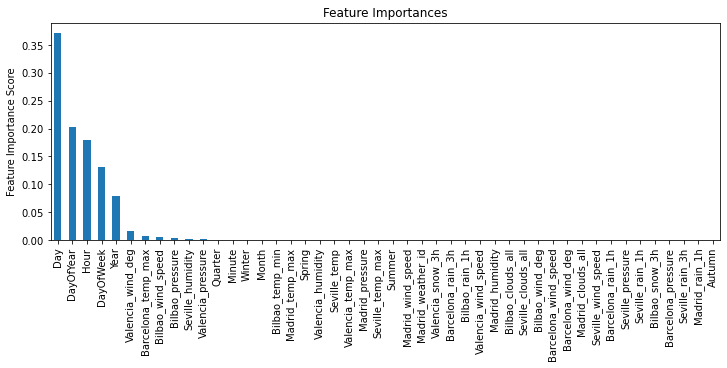

In [1287]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=5,random_state=42)
modelfit(regr_tree, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=True )


Model Report
Test RMSE: 3151.06


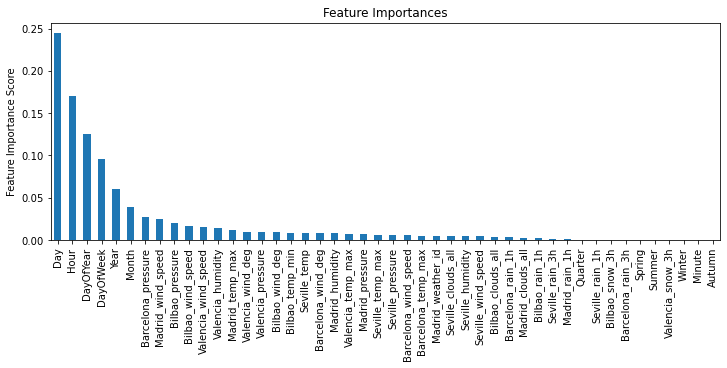

In [1288]:
RF = RandomForestRegressor(n_estimators=30, max_depth=8)
modelfit(RF, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=True )


Model Report
Test RMSE: 2481.49


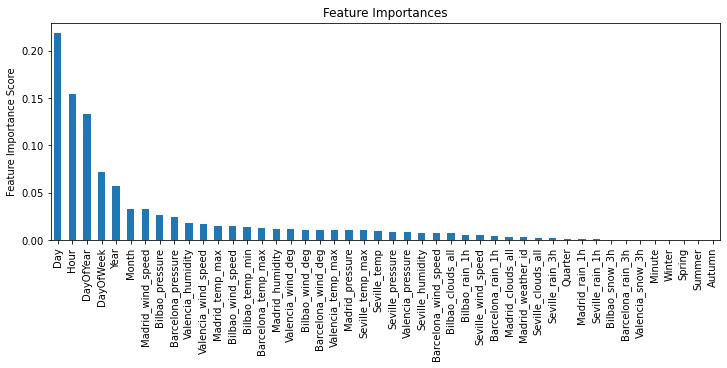

In [1289]:
gbr = GradientBoostingRegressor(max_depth=6, 
                                subsample=0.9,
                                max_features=0.75,
                                n_estimators=100,
                                random_state=2)        
modelfit(gbr, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=True )

### 5.4.0 Trained  Heterogenous Ensemble models

Ensemble methods - Heterogenous methods

In [1290]:
models = [("LM", lasso), ("RF",RF)]

In [1291]:
# voting regressor

model_weightings = np.array([0.2, 0.5])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

In [1292]:
modelfit(v_reg, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 3359.70


In [1293]:
# stacking regressor

meta_learner_reg = LinearRegression()
s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
modelfit(s_reg, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 3107.97


In [1294]:
modelfit(s_reg, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 3133.14


Ensemble methods - Homogenous methods

In [1295]:
# Bagging with decision tree as the base model

d_tree = DecisionTreeRegressor(max_depth=4)
bag_reg = BaggingRegressor(base_estimator = d_tree)
modelfit(bag_reg, X_train, X_validation, y_train, y_validation, performance=True, printFeatureImportance=False )


Model Report
Test RMSE: 4172.10


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### Next we create predictions from each of the trained models on both the training data set as well as the test data

In [1182]:
# Compare model performance

In [1183]:
# lasso model predictions
lasso_predict_train, lasso_predict_test = lasso.predict(X_train), lasso.predict(X_validation)

In [1184]:
#gredient_boost predictions
gbr_predict_train, gbr_predict_test = gbr.predict(X_train), gbr.predict(X_validation)

In [1185]:
# decision tree predictions
d_tree_predict_train, d_tree_predict_test = regr_tree.predict(X_train), regr_tree.predict(X_validation)

In [1186]:
# Random forest predictions
RF_predict_train, RF_predict_test = RF.predict(X_train), RF.predict(X_validation)

In [1187]:
# ensemble methods-voting predictions
ens_voting_predict_train, ens_voting_predict_test = v_reg.predict(X_train), v_reg.predict(X_validation)

In [1188]:
# ensemble methods-stacking predictions
ens_stacking_predict_train, ens_stacking_predict_test = s_reg.predict(X_train), s_reg.predict(X_validation)

To easily compare the performance of the various models we next create a dataframe to display the model root mean square error on both the training set and the test set

In [1189]:
results_dict = {'train_RMSE':
                    {
                        "lasso": math.sqrt(metrics.mean_squared_error(y_train, lasso_predict_train)),
                        
                        "d_tree": math.sqrt(metrics.mean_squared_error(y_train, d_tree_predict_train)),
                        "RF": math.sqrt(metrics.mean_squared_error(y_train, RF_predict_train)),
                        "ens_voting": math.sqrt(metrics.mean_squared_error(y_train, ens_voting_predict_train)),
                        "ens_stacking": math.sqrt(metrics.mean_squared_error(y_train, ens_stacking_predict_train)),
                        "gbr": math.sqrt(metrics.mean_squared_error(y_train, gbr_predict_train))
                    },
                'test_RMSE':
                    {
                        "lasso": math.sqrt(metrics.mean_squared_error(y_validation, lasso_predict_test)),
                        
                        "d_tree": math.sqrt(metrics.mean_squared_error(y_validation, d_tree_predict_test)),
                        "RF": math.sqrt(metrics.mean_squared_error(y_validation, RF_predict_test)),
                        "ens_voting": math.sqrt(metrics.mean_squared_error(y_validation, ens_voting_predict_test)),
                        "ens_stacking": math.sqrt(metrics.mean_squared_error(y_validation, ens_stacking_predict_test)),
                        "gbr": math.sqrt(metrics.mean_squared_error(y_validation, gbr_predict_test)),
                    }
                }

# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

The dataframe is then sorted by `test_RMSE` to place the model with the lowest RMSE first.

In [1190]:

results_df.sort_values("test_RMSE")

,train_RMSE,test_RMSE
gbr,1.687926e+03,2502.281304
ens_stacking,2.625293e+03,3136.182582
RF,2.707778e+03,3159.117558
ens_voting,3.063251e+03,3379.313009
d_tree,3.966787e+03,4010.285963
lasso,1.142593e+06,634893.277088


In [1191]:
def gen_kaggle_csv(model, df):
    
    pred = model.predict(df)
    daf = pd.DataFrame(pred, columns=['load_shortfall_3h'])
    output = pd.DataFrame({"time":test_df['time']})
    kaggle= pd.concat([output,daf], axis=1)
    kaggle.to_csv('kaggle.csv', index=False)

    return kaggle
gen_kaggle_csv(gbr, test_df_clean)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11569.179530
1,2018-01-01 03:00:00,9212.193491
2,2018-01-01 06:00:00,8222.867764
3,2018-01-01 09:00:00,8449.889415
4,2018-01-01 12:00:00,10372.262851
...,...,...
2915,2018-12-31 09:00:00,8948.764888
2916,2018-12-31 12:00:00,12768.165252
2917,2018-12-31 15:00:00,12365.591234
2918,2018-12-31 18:00:00,11540.223330


We then create a dataframe to compare the predictions of the different models with the actual load_shortfall values.

To make it simpler to create plots using the inbuilt plot method of a dataframe we now convert the datatype of the `time` column into a pandas `Datetime` datatype. and then set the column as the index of the dataframe.

In [1027]:
predictions['time'] = pd.to_datetime(predictions['time'])
predictions = predictions.set_index('time')
predictions

KeyError: 'time'

⚡We now plot the output of each model with actual load_shortfall values ⚡ 

In [ ]:
predictions[['load_shortfall', 'lasso']].plot()

The overall performance of the lasso model was poor as very little linear relationship exists between the model output and the predictors

In [ ]:
predictions[['load_shortfall', 'svm']].plot()

We see a slight performance boost with the support vector machine over the linear model

In [ ]:
predictions[['load_shortfall', 'decision_tree']].plot()

The decision tree performed slightly better than every the preceding models as they are able to generalize better to non-linear relationships between predictors and output

In [ ]:
predictions[['load_shortfall', 'Random_forest']].plot()

We see a clear imporvement in predictive power when a random forest model is used over that of a decision tree

##### Next we take a look a the ensembling methods

In [ ]:
predictions[['load_shortfall', 'voting_reg']].plot()

In [ ]:
predictions[['load_shortfall', 'stacking_reg']].plot()

I is quite clear that the stacking regressor results in a much better performance as compared to the voting regressor on the validation set.

##### After considering the perfomances of the various models on the validation set, We choose the stacking regressor as or model of choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

A stacking regressor consists of several base models and one meta learner or model. The job of the base models is to create preditions based on the input data while the meta model is trained on just how much each of the model is to contribute to the final output.

This way the strengths of each model type can be bolstered while their weaknesses augmented by the other models it generally results in a better performance as observed from the plots above.

The training process is as follows (all handled by the stacking module):

    1. Each individual base learner is trained in turn on the same training dataset.
    
    2. A validation set is used to generate predictions on unseen observations from each of the trained base learners.
    
    3. These predictions - the outputs from the base learners - are used as the inputs for the meta learner model. The meta learner trains on these observations, using the labels from the validation set as the response variable.
    
<a title="Supun Setunga / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)"><img width="640" alt="Stacking" src="https://upload.wikimedia.org/wikipedia/commons/d/de/Stacking.png"></a>

The meta learner/model simply learns how each base model should be weighted to contribute to the final output.

# generate the csv file to submmit to kaggle

In [203]:
def gen_kaggle_csv(model, df):
    
    pred = model.predict(df)
    daf = pd.DataFrame(pred, columns=['load_shortfall_3h'])
    output = pd.DataFrame({"time":test_df['time']})
    kaggle= pd.concat([output,daf], axis=1)
    kaggle.to_csv('kaggle.csv', index=False)

    return Kaggle

In [204]:
gen_kaggle_csv(RF, test_df_clean)

NameError: name 'Kaggle' is not defined